## Ejercicio 1

**a)** (1 punto) Goldbach conjeturó que todo entero compuesto e impar es la suma de un primo y el doble de un cuadrado. Así, por ejemplo, $9=7+2\cdot 1^2,\ 15=7+2\cdot 2^2,\ 21=3+2\cdot 3^2,$ etc. Esta conjetura resultó ser falsa. Determina el menor entero que no cumple lo conjeturado por Goldbach.

**b)** (1 punto) Existen enteros, por ejemplo $145$,  que son iguales a la suma de los factoriales de sus dígitos. Determina **todos** los enteros con esta propiedad. 

**c)** (1 punto) Determina todas las tripletas de enteros primos de $4$ cifras tales que cumplen las dos condiciones siguientes:
    1) Los $3$ enteros están en progresión aritmética, es decir, el segundo menos el primero es igual al tercero menos el segundo.
    2) Los tres enteros de la tripleta tienen las mismas cifras y cada cifra aparece el mismo número de veces en cada uno de ellos.
    
    Por ejemplo, $(1487, 4817, 8147)$ es una de las soluciones.
 
### Apartado a)
 

In [1]:
def goldbach(N):
    testigo = 0
    for n in xsrange(2,N):
        testigo = 0
        if (not is_prime(n)) and (n%2 == 1):
            for p in prime_range(2,n):
                if (n-p)%2 == 0 and is_square((n-p)//2):
                    #L.append(n)
                    testigo = 1
                    break
            if testigo == 0:  
                     return n
    return testigo

In [2]:
goldbach(10000)

5777

### Apartado b)

In [3]:
def dig_fact(N):
    L = []
    for n in xsrange(3,N):
        L1 = n.digits()
        if n == sum(map(factorial,L1)):
            L.append(n)
    return L

In [4]:
dig_fact(10**4)

[145]

In [5]:
dig_fact(10**5)

[145, 40585]

In [6]:
%time dig_fact(10**6)

CPU times: user 9.05 s, sys: 292 ms, total: 9.34 s
Wall time: 9.05 s


[145, 40585]

In [7]:
%time dig_fact(10**7)

CPU times: user 1min 37s, sys: 1.34 s, total: 1min 39s
Wall time: 1min 38s


[145, 40585]

Pasar de $10^6$ a $10^7$ no aporta nuevas soluciones, pero para demostrar que no hay otras hay que probar *matemáticamente*  que existe un $N_0$ tal que  no hay soluciones para $N\ge N_0$. Conseguido ésto, tenemos que calcular las soluciones que pueda haber hasta $N_0$ usando el ordenador.

Para en entero de $k$ cifras el valor máximo que puede tener la suma de los factoriales de sus  cifras es $k\times 9!=k\cdot 362880$. 

In [8]:
print factorial(9);print 7*factorial(9);print 8*factorial(9)

362880
2540160
2903040


Ahora, el número de cifras decimales de $k\times 9!$ es la parte entera por exceso  de $log_{10}(k)+ log_{10}(362880)$ y basta determinar un $k$ tal que $k-1 > log_{10}(k)+ log_{10}(362880)$. 

In [9]:
print (log(7,base=10)+ log(362880,base=10)).n(); print (log(8,base=10)+ log(362880,base=10)).n()

6.40486107289105
6.46285301986874


Vemos entonces que para enteros de $8$ o más cifras decimales es imposible que el entero sea igual a la suma de los factoriales de sus cifras, porque la suma de los factoriales de las cifras se escribe con menos cifras decimales que el número. Debemos buscar soluciones hasta $N=10^8$, lo que puede tardar más de $15$ minutos.  

In [10]:
%time dig_fact(10**8)

CPU times: user 17min 18s, sys: 10.4 s, total: 17min 28s
Wall time: 17min 19s


[145, 40585]

### Apartado c)

In [11]:
def primer_intento():
    LL = []
    L = prime_range(1000,9999)
    n = len(L)
    for n1 in xsrange(n):
        for n2 in xsrange(n1+1,n):
            for n3 in xsrange(n2+1,n):
                if L[n2]-L[n1]==L[n3]-L[n2]:
                    if L[n2].digits() in Permutations(L[n1].digits()) and \
                    L[n3].digits() in Permutations(L[n1].digits()):
                        LL.append((L[n1],L[n2],L[n3]))
    return LL

In [12]:
%time primer_intento()

CPU times: user 1min 18s, sys: 892 ms, total: 1min 19s
Wall time: 1min 18s


[(1487, 4817, 8147), (2969, 6299, 9629)]

¿Podemos mejorar el tiempo? Quizá reduciendo el número de bucles anidados. 

In [13]:
def segundo_intento():
    LL = []
    L = prime_range(1000,9999)
    n = len(L)
    print n
    for n1 in xsrange(n):
        for k in xsrange(1,n):
            if n1+k < n:
                r = L[n1+k]-L[n1]
                if L[n1+k]+r in L:
                    if L[n1+k].digits() in Permutations(L[n1].digits()) and \
                    (L[n1+k]+r).digits() in Permutations(L[n1].digits()):
                        LL.append((L[n1],L[n1+k],L[n1+2*k]))
    return LL

In [14]:
%time segundo_intento()

1061
CPU times: user 13.4 s, sys: 152 ms, total: 13.5 s
Wall time: 13.2 s


[(1487, 4817, 8521), (2969, 6299, 9811)]

## Ejercicio 2

(3 puntos)  ¿Cómo decidimos si un generador de números pseudoaleatorios produce un verdadero comportamiento aleatorio? En principio, no es posible afirmar que una sucesión concreta producida por el generador es, o no es, aleatoria: todas, por muy raras que sean,  son posibles. Lo único que podemos hacer es analizar si el generador produce sucesiones que *a priori* tienen probabilidad muy baja, y si ese es el caso, empezaremos a sospechar que el generador puede no ser *suficientemente aleatorio*. En la práctica, se aplica a las sucesiones producidas por el generador una *batería de tests estadísticos* y para que lo consideremos aceptable debe pasarlos todos.

En este ejercicio estudiamos una de esas pruebas, basada en el *número de rachas*. Supongamos que $L$ es una lista de ceros y unos, de longitud $N$, producida por el generador. Una racha es una sublista de elementos consecutivos de $L$ que son todos iguales, todos ceros o todos unos, y tal que el elemento anterior a la racha y el siguiente son los dos diferentes a los de la sublista. Por ejemplo, si $L=[1,1,0,1,1,1,0,0]$ las rachas que tiene $L$ son 
$[1,1], [0],[1,1,1],[0,0]$, y, por tanto, el número de rachas es $4$. 

1) Define una función  que calcule el número de rachas en una lista de ceros y unos. 

2) La teoría nos dice que, para $N$ suficientemente grande, tomaremos $N=1000$,  y suponiendo que el generador de números aleatorios es *bueno*,  la distribución del número de rachas debe tener media $m:=501$ y varianza $v:=(m-1)(m-2)/(N-1)$ (estos valores son los que corresponden a $N=1000$). Comprueba este resultado usando listas de longitud $10^3$ generadas mediante $randint(0,1)$ y calculando el número de rachas $10^4$ veces. 

3) Además, la teoría dice que la distribución del número de rachas debe ser, para $N$ suficientemente grande, aproximadamente normal. Produce un gráfico del histograma del número de rachas, usando  los datos del apartado $2$. Debe presentar, aproximadamente,  la forma de *campana de Gauss*.

4) El test basado en el número de rachas utiliza el resultado del apartado anterior: dada una lista $L$ de longitud $N$  producida por el generador, calculamos su número de rachas $r$  y lo normalizamos en la forma $rn:=(r-m)/\sqrt{v}.$ Si $\vert rn \vert<1.96$ aceptamos que, para este test, la lista es aleatoria con *una confianza* del $95\%$, y en caso contrario declaramos que $L$ no ha pasado el test.

 Supongamos una moneda trucada con probabilidad de cara (que representamos como cero, cruz es uno)  $p_k=0.5+k\cdot 0.01$. Define, y ejecuta,  una función que calcule  el $k$ mínimo tal que una sucesión de ceros y unos de longitud $10^3$ generada con esta moneda trucada no es admitida como aleatoria por el test de rachas. 
 
 Este $k$ mínimo presenta ciertas oscilaciones cuando repetimos el cálculo. Determina  el valor promedio de $k$ basado en  $1000$   repeticiones del cálculo. 
 
 

In [1]:
def bloque(L):
    if all(L) or not any(L):
        return True
    else:
        return False



def rachas(L,nruns):
        #print L,nruns
        if L == []:
            return nruns
        elif bloque(L):
            nruns += 1
            return nruns
        elif len(L) == 2 and L[0]!= L[1]:
            nruns += 2
            return nruns
        else:
            b = L[0]
            while L[1] == b:
                L = L[1:]
            nruns += 1
            nruns = rachas(L[1:],nruns)
            return nruns

In [2]:
rachas([1,1,0,0,0,1,0,0,1,0],0)

6

Una versión iterativa, del examen de Juan Riera,  es probablemente más eficiente. Claramente usa menos líneas de código.

In [3]:
def rachas2(L):
    rachas = 1
    rachaActual = L[0]
    for i in L[1:]:
        if i != rachaActual:
            rachaActual = i
            rachas = rachas +1
    return rachas

In [5]:
## Comprobamos que dan el mismo resultado ##
def iguales():
    for muda in srange(100):
        L = [randint(0,1) for _ in srange(100)]
        if rachas(L,0) != rachas2(L):
            print "NO SON IGUALES"
    print "HE TERMINADO"
    
iguales()          

HE TERMINADO


In [17]:
def media_var(n,N):
    m = 0
    m2 = 0
    L1 = []
    for _ in xsrange(n):
        L = [randint(0,1) for muda in xsrange(N)]
        r = rachas(L,0)
        L1.append(r)
        m += r
        m2 += r**2
    media = (m/n).n()
    var = (m2/n)-media**2
    return media,var,L1

sys.setrecursionlimit(10000)
%time media,var,L = media_var(10000,1000)
print media,var

##media
mu = (501).n() ; print mu
## varianza
var = (mu-1)*(mu-2)/999; print var

CPU times: user 1min 21s, sys: 940 ms, total: 1min 22s
Wall time: 1min 21s
500.277400000000 248.634249240014
501.000000000000
249.749749749750


In [18]:
import matplotlib.pyplot as plt 
plt.hist(L, bins=1000, facecolor='lightgreen')
plt.savefig('Histogram.png')
plt.close()


In [19]:
def moneda(p):
    x = random()
    if x<p:
        return 0
    else:
        return 1
    
##media
mu = (501).n()
## varianza
var = (mu-1)*(mu-2)/999
    
    
def stat(L,mu,var):
    r = rachas(L,0)
    return ((r-mu)/sqrt(var)).n()
    
def prueba(N,mu,var):
    p = 0.5
    L = [moneda(p) for muda in xsrange(N)]
    s = stat(L,mu,var)
    while abs(s)<1.96:
        p += 0.01
        L = [moneda(p) for muda in xsrange(N)]
        s = stat(L,mu,var)
    return p

#prueba(1000)
%time sum([prueba(1000,mu,var) for muda in srange(1000)])/1000



CPU times: user 1min 4s, sys: 668 ms, total: 1min 5s
Wall time: 1min 4s


0.575980000000000

In [20]:
##media
mu = (501).n()
## varianza
var = (mu-1)*(mu-2)/999


def promedio(n,N,mu,var):
    max = 0.57
    min = 0.57
    prom = 0.0
    for muda in xsrange(n):
        p = prueba(N,mu,var)
        if p < min:
            min = p
        if p > max:
            max = p
        prom += p
    return min,max,(prom/n).n()
            

%time promedio(1000,1000,mu,var)

CPU times: user 1min 4s, sys: 676 ms, total: 1min 5s
Wall time: 1min 4s


(0.500000000000000, 0.670000000000000, 0.576960000000000)

Aunque el eneunciado no lo pide, calcullamos también el promedio junto con los valores máximo y mínimo para $p_k$ alcanzados durante el cálculo. 

## Ejercicio 3

(4 puntos) En este ejercicio estudiamos una solución aproximada del problema del viajante (TSP). Es bien sabido que no se conoce un algoritmo de tiempo polinomial para el problema, pero soluciones suboptimales obtenidas en un tiempo razonable son de gran interés práctico.

A) Representaremos las ciudades que va a visitar el viajante como puntos aleatorios en el cuadrado $[0,1]\times [0,1]$. Define una función $ciudades(n,semilla)$ que devuelva la lista de coordenadas de $n$ puntos aleatorios en el cuadrado. La semilla (*random seed*) la fijamos  para que los resultados sean reproducibles, es decir, con la misma semilla debemos obtener la misma lista de ciudades. 

B) Un circuito realizado por el viajante corresponde a una reordenación de la lista de ciudades. Entendemos que el viajante empieza en la primera ciudad, y va  a la segunda, entonces a la tercera, etc. Usamos las distancias euclídeas entre puntos del plano para medir la distancia total recorrida después de volver de la última ciudad de la lista a la primera. Define una función $distanciaT(L)$ que reciba una lista de ciudades y devuelva la longitud total del circuito. 

C) Como el número de permutaciones de una lista de longitud $n$ es $n!$, no podemos generar todas esas permutaciones y buscar directamente la que nos dé el recorrido de menor longitud total. Vamos a generar permutaciones *de una en una* mediante el siguiente procedimiento:

 i. Partimos de una permutación $L$, que será una lista,  de longitud $n$,  que contiene las  coordenadas de nuestras ciudades (Apartado A). Queremos definir una función de Sage $barajar(L)$. 
    
 ii. Con probabilidad $0.2$ elegimos un  entero aleatorio $i$ en el intervalo cerrado $[0,n//2]$, y permutamos la sublista que llega hasta el elemento de índice $i-1$, incluyéndolo,  con el resto. Las dos sublistas no se modifican, únicamente se concatena la primera sublista a continuación de la segunda, y la lista resultante sigue llamándose $L$. A continuación, elegimos un segundo entero aleatorio $j$ en el intervalo cerrado $[0,n//2]$, invertimos el trozo de $L$ que llega hasta el elemento de índice $j-1$, incluyéndolo, y la concatenamos con el resto de $L$. Devolvemos la lista resultante. 
    
 iii. Con probabilidad $0.4$ permutamos dos elementos elegidos aleatoriamente y dejamos igual el resto de la lista. Devolvemos la lista resultante.
    
 iv. Con probabilidad $0.4$ quitamos un elemento, elegido aleatoriamente, del lugar que ocupa y lo insertamos  en un lugar elegido aleatoriamente. Devolvemos la lista resultante.
   
 Después de haber ejecutado una de las alternativas (ii,iii o iv), hemos obtenido una permutación de la lista inicial $L$. Hay que entender que aproximadamente el $20\%$   de las veces que ejecutamos $barajar(L)$ se debe utilizar el método $ii$, el $40\%$ de las veces el método $iii$, etc.
 
D) En primer lugar intentamos encontrar una solución de TSP comezando con $L = ciudades(20,54321)$ y ejecutando $L = barajar(L)$ un número prefijado $N$ de veces. Para cada ordenación obtenida calculamos la longitud total y nos vamos quedando con las ordenaciones que obtienen longitud menor que la mejor que teníamos. Después de haber reordenado la lista un número $N$, suficientemente grande, de veces tenemos una solución aproximada. 
Define una función $TSP0(L,N)$ que devuelva la longitud mínima obtenida y el circuito de esa longitud. Realiza un gráfico del circuito obtenido. 

E) Ahora utilizamos un algoritmo para minimizar funciones que se conoce con el nombre de *simulated annealing*, y es una variante de Monte Carlo. 

1. El método tiene un parámetro $\beta$, que inicialmente vale $1.0$, y que vamos a ir incrementando poco a poco. Además hay un contador $n\_acept$ que vale $0$ inicialmente.  Queremos definir una función $TSP(L,beta,N)$ con $L$ la lista de ciudades y $N$ el número de vueltas del bucle que va a realizar los cálculos. 
2. Definimos una variable $long\_i$ que contiene la longitud total del circuito inicial $L$ del viajante. Copiamos en una nueva variable $mejor$ el valor de $long\_i$ y en una variable $L_mejor$ la lista de ciudades inicial $L$. 
    
3. Dentro de cada vuelta del bucle tenemos:
    
    i. Cada vez que el contador $n\_acept$ llega a $100$ lo reseteamos a cero e incrementamos $beta$ mediante $beta \ *= 1.005$.
    
    ii. Reordenamos la lista usando $L\_n=barajar(L)$ y calculamos su longitud total, que almacenamos en la variable $long\_n$. 
    
    iii. Generamos un número aleatorio $\eta$ uniforme en el intervalo $[0,1]$ y calculamos $e:=e^{-beta(long\_n- long\_i))}$. Si $\eta<e$ aceptamos la reordenación, lo que significa que aumentamos el contador $n\_acept$ en una unidad, copiamos la lista de ciudades $L\_n$ sobre la lista $L$, la longitud nueva $long\_n$ en la variable $long\_i$,  comprobamos si $long\_i$ es menor que $mejor$ y si lo es ponemos $long\_i$ en $mejor$ y copiamos la lista $L\_n$ en la variable $L\_mejor$. 

4. Cuando termina el bucle devolvemos $mejor$ y $L\_mejor$. 

5. Como el bucle, con los $N$ que utilizaremos,  puede tardar unos $90$ segundos, conviene imprimir cada  $10^4$ vueltas el valor en ese momento de la variable $mejor$. 

F) Una vez que tengas la función $TSP(L,beta,N)$, ejecuta $SOL = TSP(ciudades(20,54321),1.0,1000000)$ y utiliza la lista devuelta por $TSP$ para realizar un gráfico del circuito.  Calcula también $SOL0 = TSP0(ciudades(20,54321),1000000)$  (Apartado D) y compara los resultados.


In [21]:
### Funciones auxiliares
def dist(x, y):
    return sqrt((x[0] - y[0])** 2+(x[1] - y[1])** 2)

def longitud_circuito(ciudades):
    N = len(ciudades)
    return sum(dist(ciudades[k + 1], ciudades[k]) for k in range(N - 1)) + dist(ciudades[0], ciudades[N - 1])

def ciudades(N,seed):
    set_random_seed(seed)
    L_ciudades = [(random(), random()) for i in range(N)]
    set_random_seed()
    return L_ciudades

longitud_circuito(ciudades(20,54321))

10.564435518706462

In [22]:
def barajar(ciudades):
    N = len(ciudades)
    p = random()
    if p  < 0.2:
        i = randint(0, N // 2)
        ciudades = ciudades[i:] + ciudades[:i]
        i = randint(0, N // 2)
        a = ciudades[:i]
        a.reverse()
        ciudades_n =  a + ciudades[i:]
    elif p < 0.6:
        ciudades_n = ciudades[:]
        i = randint(1, N - 1)
        a = ciudades_n.pop(i)
        j = randint(1, N - 2)
        ciudades_n.insert(j, a)
    else:
        ciudades_n = ciudades[:]
        i = randint(1, N - 1)
        j = randint(1, N - 1)
        ciudades_n[i] = ciudades[j]
        ciudades_n[j] = ciudades[i]
    return ciudades_n

barajar(ciudades(20,54321))

[(0.30281839969534374, 0.12782026627595044),
 (0.5806191223106226, 0.8541589273863629),
 (0.37150483415207536, 0.002803103398419604),
 (0.5611077494763981, 0.7607953487321404),
 (0.6789620525421641, 0.37013053152376774),
 (0.809199142003773, 0.8564013459428749),
 (0.5011469462517265, 0.12957096901639797),
 (0.42166148024888495, 0.6202119335782863),
 (0.7726187837311405, 0.36934196144750053),
 (0.8583053284765633, 0.25512880445932107),
 (0.4274377490049903, 0.6170969514505988),
 (0.382406504468071, 0.24690010422726982),
 (0.27632720136008593, 0.29683026416331737),
 (0.13605293345073388, 0.8455714183930992),
 (0.6729204343584412, 0.5161533176953698),
 (0.9077811984206944, 0.5062727930362295),
 (0.26570697328292314, 0.07069912626072938),
 (0.6644774297069042, 0.5790140304587919),
 (0.37912582123204674, 0.8671148723295999),
 (0.10619563347229932, 0.8743394163751478)]

10.4126932975
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.65163050529
3.6516

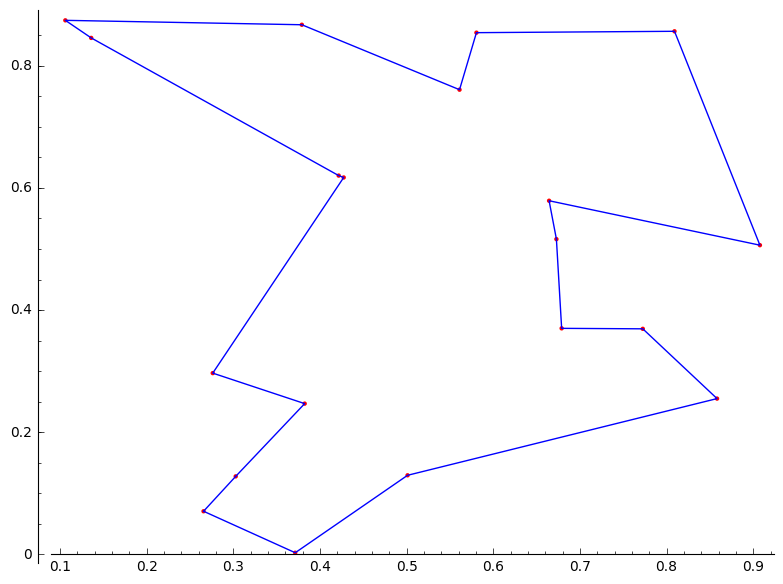

In [23]:
def TSP0(ciudades,N):
    longi = longitud_circuito(ciudades)
    for muda in xsrange(N):
        ciudades_n = barajar(ciudades)
        if longitud_circuito(ciudades_n) < longi:
            longi,ciudades = longitud_circuito(ciudades_n),ciudades_n
        if muda%10^4 == 0:
            print longi
    return longi,ciudades
  

%time SOL0 = TSP0(ciudades(20,54321),10**6)
print SOL0[0]
line(SOL0[1])+line([SOL0[1][0],SOL0[1][-1]])+points(SOL0[1],color='red')

25.4593769685
5.86558700724
5.86558700724
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.84879393827
5.8487

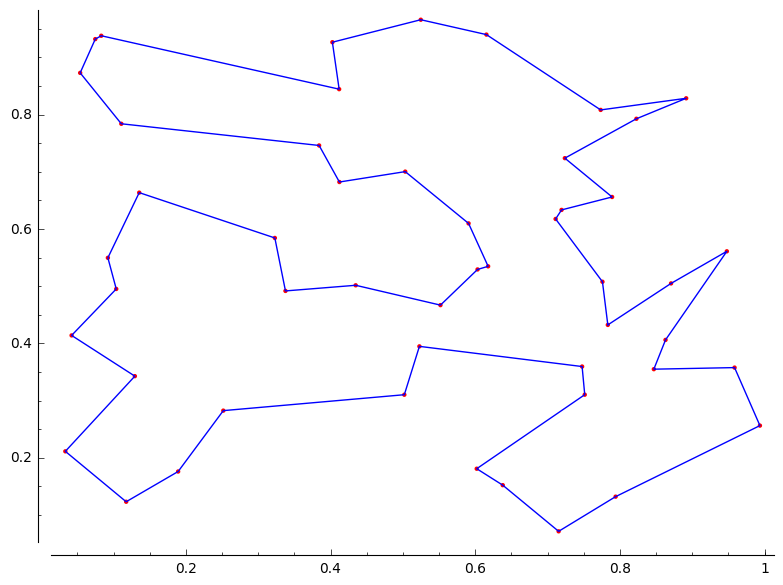

In [24]:
%time SOL0b = TSP0(ciudades(50,7654321),10**6)
print SOL0b[0]
line(SOL0b[1])+line([SOL0b[1][0],SOL0b[1][-1]])+points(SOL0b[1],color='red')

### Annealing

In [25]:
def TSP(ciudades,beta,N):
    longi = longitud_circuito(ciudades)
    mejor = longi
    n_accept = 0
    for step in xsrange(N):
            if n_accept == 100:
                beta *=  1.005
                n_accept = 0
            ciudades_n = barajar(ciudades)
            longn = longitud_circuito(ciudades_n)
            if random() < exp(- beta * (longn - longi)):
                n_accept += 1
                ciudades = ciudades_n[:]
                longi = longn
                if longi < mejor:
                    mejor = longi
                    ciudades_m = ciudades_n[:]
            if step % 100000 == 0:
                print mejor, step, 1.0/beta
    return mejor,ciudades_m

10.3074347517 0 1.00000000000000
3.91251915724 100000 0.112529127264047
3.61226450768 200000 0.0527258468285252
3.61226450768 300000 0.0309211014539839
3.61226450768 400000 0.0192521434433054
3.61226450768 500000 0.0123509280717022
3.61226450768 600000 0.00808321895985099
3.61226450768 700000 0.00536991336591171
3.61226450768 800000 0.00358522385068714
3.61226450768 900000 0.00241767209659229
CPU times: user 1min 26s, sys: 1.83 s, total: 1min 28s
Wall time: 1min 26s
3.61226450768


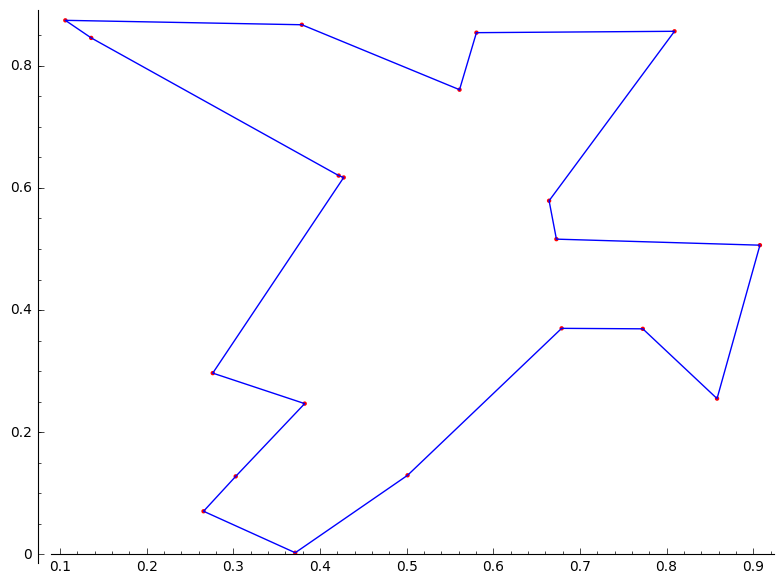

In [26]:
%time SOL = TSP(ciudades(20,54321),1.0,1000000)
print SOL[0]
line(SOL[1])+line([SOL[1][0],SOL[1][-1]])+points(SOL[1],color='red')

25.6003395802 0 1.00000000000000
9.28210045793 100000 0.124954599693821
6.49053663083 200000 0.0714748628706373
5.79440313455 300000 0.0499110704495262
5.70958668924 400000 0.0383173628186805
5.46730111529 500000 0.0307672651283422
5.46730111529 600000 0.0252026625034570
5.42689688866 700000 0.0207477026504198
5.42689688866 800000 0.0172514550215650
5.42689688866 900000 0.0144160907307409
CPU times: user 2min 49s, sys: 2.9 s, total: 2min 52s
Wall time: 2min 49s
5.42689688866


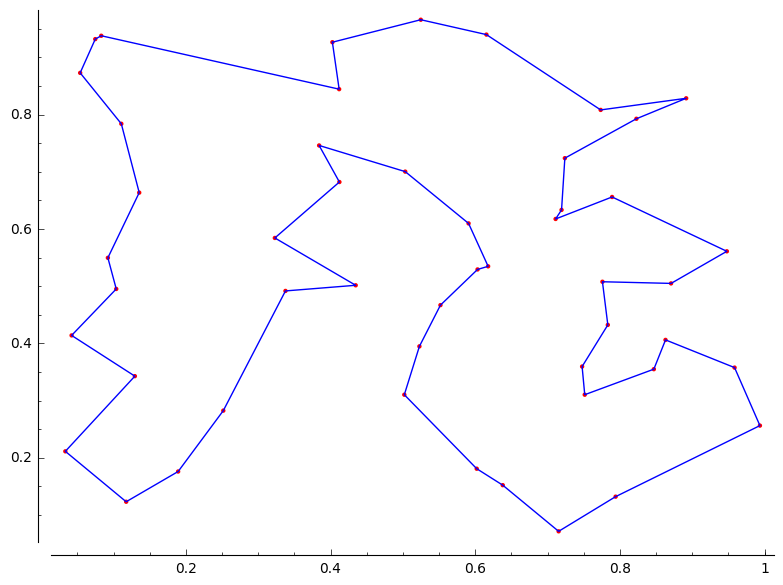

In [27]:
%time SOLb = TSP(ciudades(50,7654321),1.0,1000000)
print SOLb[0]
line(SOLb[1])+line([SOLb[1][0],SOLb[1][-1]])+points(SOLb[1],color='red')

En los dos casos (con $20$ ciudades y con $50$ ciudades), el *annealing* funciona un poco mejor, pero esta mejora no  parece muy impresionante.  